# WeRateDogs Project
## Data Wrangling Code

Author: Rahma Ali

12-Aug-2020

## 1- Gather

In [1]:
# Import required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import requests
import os
import json
import datetime
import seaborn as sns
import tweepy
from bs4 import BeautifulSoup
from tweepy import OAuthHandler
from timeit import default_timer as timer
%matplotlib inline
plt.style.use('ggplot')

# Read twitter-archive-enhanced.csv file
archive_df = pd.read_csv('twitter-archive-enhanced.csv')

In [2]:
# Download and read image-predictions.tsv file
img_pred_url = 'https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv'
img_file_name = img_pred_url.split(img_pred_url[:-len('image-predictions.tsv')])[1]
if not os.path.isfile(img_file_name):
    response = requests.get(img_pred_url)
    with open(file_name, mode='wb') as file:
        file.write(response.content)
image_predictions_df = pd.read_csv(img_file_name, sep = '\t')

In [3]:
# THE CODE IN THIS CELL WAS PROVIDED AND IT IS FOR DEMONSTRATION ONLY
# Query Twitter API for each tweet in the Twitter archive and save JSON in a text file
# These are hidden to comply with Twitter's API terms and conditions
consumer_key = 'HIDDEN'
consumer_secret = 'HIDDEN'
access_token = 'HIDDEN'
access_secret = 'HIDDEN'

auth = OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_secret)

api = tweepy.API(auth, wait_on_rate_limit=True)

# NOTE TO STUDENT WITH MOBILE VERIFICATION ISSUES:
# df_1 is a DataFrame with the twitter_archive_enhanced.csv file. You may have to
# change line 17 to match the name of your DataFrame with twitter_archive_enhanced.csv
# NOTE TO REVIEWER: this student had mobile verification issues so the following
# Twitter API code was sent to this student from a Udacity instructor
# Tweet IDs for which to gather additional data via Twitter's API
tweet_ids = archive_df.tweet_id.values
len(tweet_ids)

# Query Twitter's API for JSON data for each tweet ID in the Twitter archive
count = 0
fails_dict = {}
start = timer()
# Save each tweet's returned JSON as a new line in a .txt file
if not os.path.isfile('tweet_json.txt'):
    with open('tweet_json.txt', 'w') as outfile:
    # This loop will likely take 20-30 minutes to run because of Twitter's rate limit
        for tweet_id in tweet_ids:
            count += 1
            print(str(count) + ": " + str(tweet_id))
            try:
                tweet = api.get_status(tweet_id, tweet_mode='extended')
                print("Success")
                json.dump(tweet._json, outfile)
                outfile.write('\n')
            except tweepy.TweepError as e:
                print("Fail")
                fails_dict[tweet_id] = e
                pass
end = timer()
print(end - start)
print(fails_dict)

0.0011046429999908014
{}


In [4]:
# Extract data from Twitter API tweet-json.txt file
tweet_list = []
with open('tweet_json.txt', mode='r') as file:
    for line in file:
        tweet = json.loads(file.readline())
        tweet_id = tweet['id']
        retweet_count = tweet['retweet_count']
        favorite_count = tweet['favorite_count']
        tweet_list.append({'tweet_id': tweet_id,
                           'retweet_count': retweet_count,
                           'favorite_count': favorite_count})
api_df = pd.DataFrame(tweet_list, columns = ['tweet_id', 'retweet_count', 'favorite_count'])
api_df.head()

,tweet_id,retweet_count,favorite_count
0,892177421306343426,6514,33819
1,891689557279858688,8964,42908
2,891087950875897856,3261,20562
3,890729181411237888,16716,56848
4,890240255349198849,7711,32467


## 2- Assess
### `archive_df`

In [5]:
# Programmatic assessment
archive_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tweet_id                    2356 non-null   int64  
 1   in_reply_to_status_id       78 non-null     float64
 2   in_reply_to_user_id         78 non-null     float64
 3   timestamp                   2356 non-null   object 
 4   source                      2356 non-null   object 
 5   text                        2356 non-null   object 
 6   retweeted_status_id         181 non-null    float64
 7   retweeted_status_user_id    181 non-null    float64
 8   retweeted_status_timestamp  181 non-null    object 
 9   expanded_urls               2297 non-null   object 
 10  rating_numerator            2356 non-null   int64  
 11  rating_denominator          2356 non-null   int64  
 12  name                        2356 non-null   object 
 13  doggo                       2356 

In [5]:
archive_df.sample(10) # exploring the dataframe

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
1719,680161097740095489,NaN,NaN,2015-12-24 23:00:17 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Meet Goliath. He's an example of irony. Head i...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/680161097...,12,10,Goliath,None,None,None,None
720,783347506784731136,NaN,NaN,2016-10-04 16:46:14 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @dog_rates: This is Kenny. He just wants to...,6.742918e+17,4.196984e+09,2015-12-08 18:17:56 +0000,https://twitter.com/dog_rates/status/674291837...,11,10,Kenny,None,None,None,None
1683,681694085539872773,NaN,NaN,2015-12-29 04:31:49 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Bo. He's a Benedoop Cumbersnatch. Seem...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/681694085...,11,10,Bo,None,None,pupper,None
1948,673697980713705472,NaN,NaN,2015-12-07 02:58:09 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Pickles. She's a tiny pointy pupper. A...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/673697980...,8,10,Pickles,None,None,pupper,None
609,797545162159308800,NaN,NaN,2016-11-12 21:02:38 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Cassie. She steals things. Guilt incre...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/797545162...,12,10,Cassie,None,None,None,None
1127,729838605770891264,7.291135e+17,4.196984e+09,2016-05-10 01:00:58 +0000,"<a href=""http://twitter.com/download/iphone"" r...","""Challenge completed"" \n(pupgraded to 12/10) h...",NaN,NaN,NaN,https://twitter.com/dog_rates/status/729838605...,12,10,None,None,None,None,None
1047,743510151680958465,NaN,NaN,2016-06-16 18:26:48 +0000,"<a href=""http://twitter.com"" rel=""nofollow"">Tw...","This is Beya. She doesn't want to swim, so she...",NaN,NaN,NaN,https://twitter.com/dog_rates/status/743510151...,13,10,Beya,None,None,None,None
1182,718971898235854848,NaN,NaN,2016-04-10 01:20:33 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Sadie. She is prepared for battle. 10/...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/718971898...,10,10,Sadie,None,None,None,None
2168,669354382627049472,NaN,NaN,2015-11-25 03:18:15 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Meet Dug. Dug fucken loves peaches. 8/10 https...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/669354382...,8,10,Dug,None,None,None,None
2172,669327207240699904,NaN,NaN,2015-11-25 01:30:16 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Just got home from college. Dis my dog. She do...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/669327207...,13,10,None,None,None,None,None


In [6]:
sum(archive_df.tweet_id.duplicated()) # checking for duplicate tweets

0

In [7]:
# checking tweets with no ratings
archive_df[archive_df.rating_numerator == 0] 
archive_df[archive_df.rating_denominator == 0]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
313,835246439529840640,8.352460e+17,26259576.0,2017-02-24 21:54:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@jonnysun @Lin_Manuel ok jomny I know you're e...,NaN,NaN,NaN,NaN,960,0,None,None,None,None,None


In [8]:
archive_df.retweeted_status_id.isnull().sum() # checking presence of retweets

2175

### `image_predictions_df`

In [9]:
image_predictions_df.sample(10)

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
1210,742465774154047488,https://pbs.twimg.com/media/Ck3EribXEAAPhZn.jpg,1,web_site,0.997154,False,comic_book,0.000439,False,desktop_computer,0.000268,False
2016,879862464715927552,https://pbs.twimg.com/media/DDXmPrbWAAEKMvy.jpg,3,basset,0.813507,True,beagle,0.146654,True,cocker_spaniel,0.009485,True
741,687317306314240000,https://pbs.twimg.com/media/CYnXcLEUkAAIQOM.jpg,1,Shih-Tzu,0.747208,True,Maltese_dog,0.091025,True,Lhasa,0.035788,True
1161,734787690684657664,https://pbs.twimg.com/media/CjJ9gQ1WgAAXQtJ.jpg,4,golden_retriever,0.883991,True,chow,0.023542,True,Labrador_retriever,0.016056,True
13,666082916733198337,https://pbs.twimg.com/media/CT5m4VGWEAAtKc8.jpg,1,pug,0.489814,True,bull_mastiff,0.404722,True,French_bulldog,0.048960,True
140,668544745690562560,https://pbs.twimg.com/media/CUcl5jeWsAA6ufS.jpg,1,bearskin,0.427870,False,bow,0.258858,False,panpipe,0.021563,False
1903,851953902622658560,https://pbs.twimg.com/media/C4KHj-nWQAA3poV.jpg,1,Staffordshire_bullterrier,0.757547,True,American_Staffordshire_terrier,0.149950,True,Chesapeake_Bay_retriever,0.047523,True
1980,871032628920680449,https://pbs.twimg.com/media/DBaHi3YXgAE6knM.jpg,1,kelpie,0.398053,True,macaque,0.068955,False,dingo,0.050602,False
1190,739844404073074688,https://pbs.twimg.com/media/CkR0jrhWYAALL5N.jpg,1,toy_poodle,0.342397,True,table_lamp,0.104451,False,miniature_poodle,0.079871,True
690,684195085588783105,https://pbs.twimg.com/media/CX6_y6OU0AAl3v2.jpg,1,Chihuahua,0.379365,True,toy_terrier,0.121809,True,Boston_bull,0.095981,True


In [10]:
image_predictions_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   tweet_id  2075 non-null   int64  
 1   jpg_url   2075 non-null   object 
 2   img_num   2075 non-null   int64  
 3   p1        2075 non-null   object 
 4   p1_conf   2075 non-null   float64
 5   p1_dog    2075 non-null   bool   
 6   p2        2075 non-null   object 
 7   p2_conf   2075 non-null   float64
 8   p2_dog    2075 non-null   bool   
 9   p3        2075 non-null   object 
 10  p3_conf   2075 non-null   float64
 11  p3_dog    2075 non-null   bool   
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


In [11]:
sum(image_predictions_df.tweet_id.duplicated()) # checking for duplicate tweets

0

### `api_df`

In [12]:
api_df.sample(10)

,tweet_id,retweet_count,favorite_count
180,829449946868879360,2329,11519
758,690735892932222976,1442,4134
253,812503143955202048,1424,6787
764,690015576308211712,836,2740
937,675109292475830276,1259,3006
495,748575535303884801,2272,6696
826,683391852557561860,2702,8356
973,673689733134946305,700,1855
243,813944609378369540,3732,0
895,677331501395156992,265,1189


In [13]:
api_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1177 entries, 0 to 1176
Data columns (total 3 columns):
 #   Column          Non-Null Count  Dtype
---  ------          --------------  -----
 0   tweet_id        1177 non-null   int64
 1   retweet_count   1177 non-null   int64
 2   favorite_count  1177 non-null   int64
dtypes: int64(3)
memory usage: 27.7 KB


In [14]:
sum(api_df.tweet_id.duplicated()) # checking for duplicate tweets

0

### Quality issues

- Missing dog classification observations are stored as `None`
- Dog classification is not mutually exclusive
- `tweet_id` variable is stored as integer instead of string
- `source` variable values of urls is surrounded by tags
- `timestamp` variable is stored as  string instead of datetime
- `name` variable contains a number of wrong entries (`all`, `some`, ... etc)
- Data contains retweets and replies and not just original tweets
- Data contains tweets with no images
- `name` variable contains the value `none` to represent missing values
- The 4 dummy dog classification variables (`doggo`, `floofer`, `pupper`, `puppo`) are not mutually exclusive
- Fix `rating_numerator` column values

### Tidiness issues:
- Dog classification values are present in column headers i
- Image prediction algorithm values are present in the column headers 
- Tweets observations are stored in multiple tables


## 3- Clean

In [6]:
# Make copies of the dataframes
archive_df_clean = archive_df.copy()
image_predictions_df_clean = image_predictions_df.copy()
api_df_clean = api_df.copy()

### Define:
- Store values of columns headers in `image_predictions_df` in variables 
- Replace `None` values with `NaN` or empty strings in dog classification variables
- Combine the 4 dummy dog classification variables (doggo, floofer, pupper, puppo) to one `dog_class` variable and fix rows with multiple dog classification
- Convert `tweet_id` variable type to string in all dataframes to prepare for data merge
- Remove extra tags in `source` variable
- Fix non-capitalized and erroneous entries in `name` variable
- Merge all three datasets on `tweet_id`and make a clean copy of the dataframe
- Identify and remove retweets from the master dataframe and tweets without photos
- Convert `timestamp` variable type to `datetime`

### Code:

In [7]:
# Store values of columns headers in `image_predictions_df` in variables 
image_predictions_df_clean.rename(columns = {'p1_conf': 'confidence1',
                                 'p2_conf': 'confidence2',
                                 'p3_conf': 'confidence3',
                                 'p1_dog': 'dog1',
                                 'p1_dog': 'dog1',
                                 'p2_dog': 'dog2',
                                 'p3_dog': 'dog3',
                                 'p1': 'breed1',
                                 'p2': 'breed2',
                                 'p3': 'breed3'}, inplace=True) # rename columns to prep for reshape
image_predictions_df_clean = pd.wide_to_long(image_predictions_df_clean, stubnames=['confidence', 'dog', 'breed'], i='tweet_id', j='algorithm').reset_index()
image_predictions_df_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6225 entries, 0 to 6224
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   tweet_id    6225 non-null   int64  
 1   algorithm   6225 non-null   int64  
 2   jpg_url     6225 non-null   object 
 3   img_num     6225 non-null   int64  
 4   confidence  6225 non-null   float64
 5   dog         6225 non-null   bool   
 6   breed       6225 non-null   object 
dtypes: bool(1), float64(1), int64(3), object(2)
memory usage: 298.0+ KB


In [8]:
# Replace `None` values with `NaN` or empty strings in dog classification variables
for var in ['doggo', 'pupper', 'puppo', 'floofer']:
    archive_df_clean[var].replace('None', '', inplace = True)

In [9]:
# Combine the 4 dummy dog classification variables (doggo, floofer, pupper, puppo) to one `dog_class` variable
archive_df_clean['dog_class'] = archive_df_clean.doggo.astype(str) + archive_df_clean.floofer.astype(str) + archive_df_clean.pupper.astype(str) + archive_df_clean.puppo.astype(str)
archive_df_clean = archive_df_clean.drop(['doggo', 'pupper', 'puppo', 'floofer'], axis = 1) # remove redundant dog classification dummy variables

# Fix rows with multiple dog classification
archive_df_clean['dog_class'].replace('doggopupper', '', inplace = True)
archive_df_clean['dog_class'].replace('doggopuppo', '', inplace = True)
archive_df_clean['dog_class'].replace('doggofloofer', '', inplace = True)
archive_df_clean['dog_class'].replace('', np.nan, inplace = True)

In [10]:
# Convert `tweet_id` variable type to string in all dataframes
dfs_clean = [archive_df_clean, image_predictions_df_clean, api_df_clean]
for df in dfs_clean:
    df['tweet_id'] = df['tweet_id'].astype(str)

In [11]:
# Remove extra tags in `source` variable
archive_df_clean['tweet_source'] = archive_df_clean['source'].apply(lambda x: BeautifulSoup(x).get_text())
archive_df_clean.drop('source', axis = 1, inplace = True)

In [12]:
# Fix `rating_numerator` column values
archive_df_clean['rating_numerator'] = archive_df_clean.text.str.extract('(\d+\.?\d?\d?)\/\d{1,3}', expand = False).astype('float')

In [13]:
# Fix non-capitalized and erroneous entries in `name` variable
archive_df_clean['name'].replace('None', '', inplace = True) # replace `None` values to empty string to represent missing values
archive_df_clean['name'] = archive_df_clean['name'].apply(lambda x: x.title()) # capitalize name values

In [14]:
# Merge all three datasets on tweet_id and make a clean copy of the dataframe
master_df1 = pd.merge(image_predictions_df_clean, archive_df_clean, on = 'tweet_id', how = 'left')
master_df = pd.merge(master_df1, api_df_clean, on = 'tweet_id', how = 'left')
master_df_clean = master_df.copy()

In [15]:
# Identify and remove retweets and replies and drop unwanted retweets and replies columns and tweets without photos
master_df_clean = master_df_clean.query('retweeted_status_id == "NaN"') # remove retweets
master_df_clean = master_df_clean.query('in_reply_to_status_id == "NaN"').drop(['retweeted_status_id', 'retweeted_status_user_id', 'retweeted_status_timestamp', 'in_reply_to_status_id', 'in_reply_to_user_id'], axis = 1) # filter out replies and remove their relevant variables

In [16]:
# Convert `timestamp` variable type to datetime
master_df_clean.timestamp = pd.to_datetime(master_df_clean.timestamp)

### Test:

In [17]:
# Store values of columns headers in `image_predictions_df_clean` in variables 
image_predictions_df_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6225 entries, 0 to 6224
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   tweet_id    6225 non-null   object 
 1   algorithm   6225 non-null   int64  
 2   jpg_url     6225 non-null   object 
 3   img_num     6225 non-null   int64  
 4   confidence  6225 non-null   float64
 5   dog         6225 non-null   bool   
 6   breed       6225 non-null   object 
dtypes: bool(1), float64(1), int64(2), object(3)
memory usage: 298.0+ KB


In [18]:
# Replace `None` values with `NaN` or empty strings in dog classification variables
archive_df_clean.dog_class.value_counts()

pupper     245
doggo       83
puppo       29
floofer      9
Name: dog_class, dtype: int64

In [19]:
# Combine the 4 dummy dog classification variables (doggo, floofer, pupper, puppo) to one `dog_class` variable
archive_df_clean.dog_class.value_counts() 

pupper     245
doggo       83
puppo       29
floofer      9
Name: dog_class, dtype: int64

In [20]:
# Fix rows with multiple dog classification
archive_df_clean.dog_class.value_counts()

pupper     245
doggo       83
puppo       29
floofer      9
Name: dog_class, dtype: int64

In [21]:
# Convert `tweet_id` variable type to string in all dataframes
dfs_clean = [archive_df_clean, image_predictions_df_clean, api_df_clean]
for df in dfs_clean:
    print(df['tweet_id'].dtype)

object
object
object


In [22]:
# Remove extra tags in `source` variable
archive_df_clean['tweet_source'].value_counts()

Twitter for iPhone     2221
Vine - Make a Scene      91
Twitter Web Client       33
TweetDeck                11
Name: tweet_source, dtype: int64

In [23]:
# Fix `rating_numerator` column values
archive_df_clean[archive_df_clean.text.str.contains("(\d+\.\d*\/\d+)")][['text', 'rating_numerator']]

/opt/anaconda3/lib/python3.7/site-packages/pandas/core/strings.py:1952: UserWarning: This pattern has match groups. To actually get the groups, use str.extract.
  return func(self, *args, **kwargs)


,text,rating_numerator
45,This is Bella. She hopes her smile made you sm...,13.50
340,"RT @dog_rates: This is Logan, the Chow who liv...",9.75
695,"This is Logan, the Chow who lived. He solemnly...",9.75
763,This is Sophie. She's a Jubilant Bush Pupper. ...,11.27
1689,I've been told there's a slight possibility he...,9.50
1712,Here we have uncovered an entire battalion of ...,11.26


In [24]:
# Fix non-capitalized and erroneous entries in name column
archive_df_clean['name'].sample(5)

1521    Cedrick
2283     Joshwa
2242           
1132           
2352          A
Name: name, dtype: object

In [25]:
# Merge all three datasets on tweet_id
master_df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5913 entries, 0 to 6224
Data columns (total 17 columns):
 #   Column              Non-Null Count  Dtype              
---  ------              --------------  -----              
 0   tweet_id            5913 non-null   object             
 1   algorithm           5913 non-null   int64              
 2   jpg_url             5913 non-null   object             
 3   img_num             5913 non-null   int64              
 4   confidence          5913 non-null   float64            
 5   dog                 5913 non-null   bool               
 6   breed               5913 non-null   object             
 7   timestamp           5913 non-null   datetime64[ns, UTC]
 8   text                5913 non-null   object             
 9   expanded_urls       5913 non-null   object             
 10  rating_numerator    5913 non-null   float64            
 11  rating_denominator  5913 non-null   int64              
 12  name                5913 non-null 

In [26]:
# Identify and remove retweets and replies and drop unwanted retweets and replies columns and tweets without photos
master_df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5913 entries, 0 to 6224
Data columns (total 17 columns):
 #   Column              Non-Null Count  Dtype              
---  ------              --------------  -----              
 0   tweet_id            5913 non-null   object             
 1   algorithm           5913 non-null   int64              
 2   jpg_url             5913 non-null   object             
 3   img_num             5913 non-null   int64              
 4   confidence          5913 non-null   float64            
 5   dog                 5913 non-null   bool               
 6   breed               5913 non-null   object             
 7   timestamp           5913 non-null   datetime64[ns, UTC]
 8   text                5913 non-null   object             
 9   expanded_urls       5913 non-null   object             
 10  rating_numerator    5913 non-null   float64            
 11  rating_denominator  5913 non-null   int64              
 12  name                5913 non-null 

In [27]:
# Convert `timestamp` variable type to datetime
master_df_clean['timestamp'].dtype

datetime64[ns, UTC]

## 4- Store

In [28]:
# Save cleaned master dataframe (master_df_clean) to .csv file
master_df_clean.to_csv('twitter_archive_master.csv', index=False)

## 5- Analysis and Visualization

Analyze and visualize your wrangled data in your wrangle_act.ipynb Jupyter Notebook. At least three (3) insights and one (1) visualization must be produced.



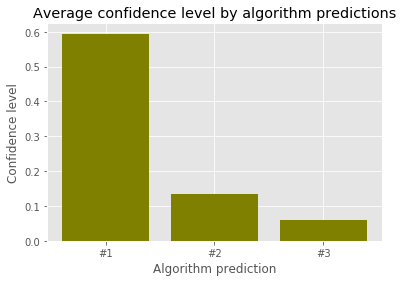

In [29]:
# Compare the three image prediction algorithms in terms of confidence level
master_df_clean.query('dog == True')
algorithm_confidence = master_df_clean.groupby('algorithm')['confidence'].mean()
plt.bar([0,1,2], algorithm_confidence, color='olive')
plt.xlabel("Algorithm prediction")
plt.ylabel("Confidence level")
plt.title("Average confidence level by algorithm predictions")
plt.xticks([0,1,2], ['#1','#2','#3'])
plt.show()

In [30]:
# Will stick to algoirthm prediction #1 only in the dataset since it has the highest average confidence level
master_df_clean_1 = master_df_clean.query('algorithm == 1')

In [31]:
# Show frequency of dog classifications in the data
master_df_clean_1['dog_class'].value_counts()

pupper     201
doggo       63
puppo       22
floofer      7
Name: dog_class, dtype: int64

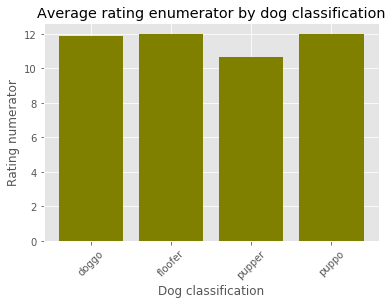

In [32]:
# Plot average dog rating enumerator based on dog classification
dog_class_mean_numerator = master_df_clean_1.groupby('dog_class')['rating_numerator'].mean()
dogs = ['doggo', 'floofer', 'pupper', 'puppo']
location = [i for i, _ in enumerate(dog_class_mean_numerator)]

plt.bar(location, dog_class_mean_numerator, color='olive')
plt.xlabel("Dog classification")
plt.ylabel("Rating numerator")
plt.title("Average rating enumerator by dog classification")
plt.xticks(location, dogs)
plt.xticks(rotation=45)
plt.show()

In [33]:
dog_class_mean_numerator

dog_class
doggo      11.888889
floofer    12.000000
pupper     10.638159
puppo      12.000000
Name: rating_numerator, dtype: float64

In [34]:
# See mode of dog classification
master_df_clean_1['dog_class'].value_counts()

pupper     201
doggo       63
puppo       22
floofer      7
Name: dog_class, dtype: int64

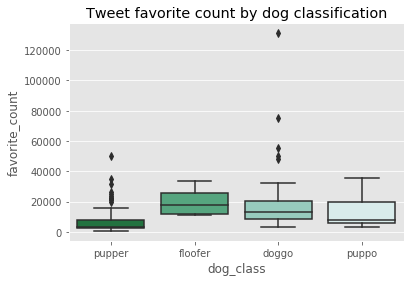

In [35]:
# Show spread of tweet favorite count grouped by dog_classification
chart = sns.boxplot(y='favorite_count', x='dog_class', 
                 data=master_df_clean_1, 
                 palette="BuGn_r").set_title("Tweet favorite count by dog classification");


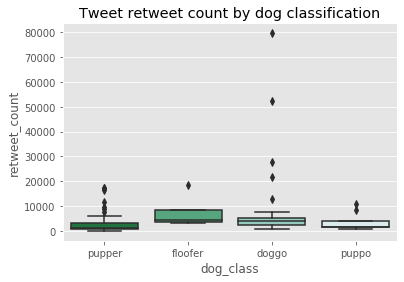

In [36]:
# Show spread of tweet retweet count grouped by dog_classification
chart = sns.boxplot(y='retweet_count', x='dog_class', 
                 data=master_df_clean_1, 
                 palette="BuGn_r").set_title("Tweet retweet count by dog classification");

In [37]:
# See tweet with highest favorite count
master_df_clean_1[master_df_clean_1['favorite_count'] == master_df_clean_1['favorite_count'].max()]['expanded_urls']

1221    https://twitter.com/dog_rates/status/744234799...
Name: expanded_urls, dtype: object

In [38]:
# See tweet with highest retweet count
master_df_clean_1[master_df_clean_1['retweet_count'] == master_df_clean_1['retweet_count'].max()]['expanded_urls']

1221    https://twitter.com/dog_rates/status/744234799...
Name: expanded_urls, dtype: object

In [39]:
# Show sum tweet favorite count by dog classification
master_df_clean_1.groupby('dog_class')['favorite_count'].sum()

dog_class
doggo      704906.0
floofer     80089.0
pupper     743518.0
puppo      120011.0
Name: favorite_count, dtype: float64

In [40]:
# Show sum tweet retweet count by dog classification
master_df_clean_1.groupby('dog_class')['retweet_count'].sum()

dog_class
doggo      290958.0
floofer     30635.0
pupper     260992.0
puppo       33822.0
Name: retweet_count, dtype: float64

In [41]:
# Show frequency of tweets in each month and in each year in the data
master_df_clean_1['year'] = master_df_clean_1['timestamp'].dt.year.astype(str)
master_df_clean_1['month'] = master_df_clean_1['timestamp'].dt.month.astype(str)

master_df_clean_1['year'].value_counts(), master_df_clean_1['month'].value_counts()

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


(2016    962
 2015    655
 2017    354
 Name: year, dtype: int64,
 12    414
 11    347
 1     232
 2     172
 3     165
 7     137
 6     123
 5      98
 4      94
 10     65
 9      63
 8      61
 Name: month, dtype: int64)